In order to successfully complete this assignment, you must do the required reading, watch the provided videos and complete all instructions. 
The embedded Google form must be entirely filled out and submitted on or before **11:59pm on Monday Feb. 25th**. 
Students must come to class the next day prepared to discuss the material covered in this assignment. 

# Pre-Class Assignment: Matrix Spaces

*Read sections 4.4-4.5, 5.1 of the textbook before doing this assignment.*

# Goals for today's pre-class assignment 

</p>

1. Properties of Invertible Matrices - Theorem 4.18
1. The Basis of a Vector Space
1. Change of Basis
1. Assignment wrap-up

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

# 1.  Properties of Invertible Matrices - Theorem 4.18
Let $A$ be an $n \times n$ matrix. The following statements are equivalent.

- $|A| \ne 0$
- $A$ is invertible.
- $A$ is row equivalent to $I_n$ (i.e. it's reduced row echelon form is $I_n$)
- The system of equations $Ax = b$ has a unique solution.
- $rank(A) = n$
- The column vectors of $A$ form a basis for $R^n$

Consider the following set of two vectors:

$$B = \{(1,2), (3,-1)\}$$


&#9989; <font color=red>**QUESTION 1:**</font> Using some of the properties of Theorm 4.18, how could you show that $B$ is a basis of $R^2$?

In [1]:
b1 = [1,2]
b2 = [3,1]
b = np.matrix([[1,2],[3,-1]])
c = np.matrix([[0],[0]])
np.linalg.solve(b,c)
# Linear Independent since constants have unique solution of 0
# or if determinant is 0

NameError: name 'np' is not defined

Consider the following matrix: 

$$A = 
\left[
\begin{matrix}
    1 & -3 \\
    -2 & 6
\end{matrix}
\right] 
$$

&#9989; <font color=red>**DO THIS**</font> Find the reduced echelon form of $A$.

In [3]:
A = np.matrix([[1,-3],[-2,6]])
sym.Matrix(A).rref()

⎛⎡1  -3⎤      ⎞
⎜⎢     ⎥, (0,)⎟
⎝⎣0  0 ⎦      ⎠

&#9989; <font color=red>**QUESTION 2**</font> Based on the answer above and Theorm 4.18, does $Ax=0$ have a unique solution? Explain your answer.

In [2]:
#No unique solution, only one linear independant equation as can be seen with all 0 on bottom line. Or because determinant is 0

&#9989; <font color=red>**QUESTION 3:**</font> What is the rank of $A$?

In [5]:
# Only one linear independant equation as seen from the result of rref
np.linalg.matrix_rank(A)

1

&#9989; <font color=red>**QUESTION 4:**</font> What is(are) the solution(s) to $Ax=0$?

(x1,x2) = (3*x2, x2)

# 2. The Basis of a Vector Space

Let $U$ be a vector space with basis $B=\{u_1, \ldots, u_n\}$, and let $u$ be a vector in $U$. 
Because a basis "spans" the vector space, we know that there exists unique scalars $a_1, \dots a_n$ such that:

$$ u = a_1u_1 + \dots + a_nu_n$$

The values $a_1, \dots, a_n$ are called the **coordinates of $u$** relative to the basis ($B$) and is typically written as a column vector:

$$ u_B = 
\left[
\begin{matrix}
    a_1  \\
    \vdots  \\
    a_n 
 \end{matrix}
\right] 
$$

We can create a *transition matrix* $P$ using the inverse of the matrix with the basis vectors being columns. 

$$P = [ u_1  \ldots  u_n ]^{-1}$$

Now we will show that matrix $P$ will transition vector $u$ in the standard coordinate system to the coordinates relative to the basis $B$:

$$ u_B = Pu$$

**EXAMPLE**: Consider the vector $u = \left[ \begin{matrix} 5 \\ 3 \end{matrix} \right]$ and the basis vectors $B = \{(1,2), (3,-1)\}$. 
The following code calculate the $P$ *transition matrix* from $B$ and then use $P$ to calculate the values of $u_B$ ($a_1$ and $a_2$):


In [6]:
B = np.matrix([[1,2],[3,-1]]).T
u = np.matrix([[5],[3]])
P = np.linalg.inv(B)
ub = P*u

sym.Matrix(ub)

⎡2.0⎤
⎢   ⎥
⎣1.0⎦

Here we would like to view this from $R^n$ 
Let $$B=[u_1 \dots u_n],$$
then the values of $u_B$ can be found by solving the linear system $$u = B u_B.$$
Because the columns of $B$ is a basis, therefore, the matrix $B$ is a $n\times n$ square matrix and it has an inverse. 
Therefore, we can solve the linear system and obtain 
$$u_b = B^{-1} u = Pu.$$


Let's try to visualize this with a plot:

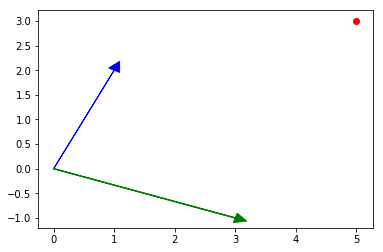

In [7]:
ax = plt.axes();


#Blue arrow representing first Basis Vector
ax.arrow(0, 0, B[0,0],B[1,0], head_width=.2, head_length=.2, fc='blue', ec='blue');


#Green arrow representing Second Basis Vector
plt.plot([0,B[0,1]],[0,B[1,1]],color='green'); #Need this line to make the figure work. Not sure why.
ax.arrow(0, 0, B[0,1],B[1,1], head_width=.2, head_length=.2, fc='green', ec='green');

#Original point u as a red dot
ax.scatter(u[0,0],u[1,0], color='red');

plt.show()
#plt.axis('equal');


Notice that the blue arrow represents the first basis vector and the green arrow is the second basis vector in $B$. 
The solution to $u_B$ shows 2 units along the blue vector and 1 units along the green vector, which puts us at the point (5,3). 

This is also called a change in coordinate systems.

&#9989; <font color=red>**QUESTION 5**</font>: What is the coordinate vector of $u$ relative to the given basis $B$ in $R^3$:  

$$u = (9,-3,21)$$
$$B = \{(2,0,-1), (0,1,3), (1,1,1)\}$$

In [8]:
B = np.matrix([[2,0,-1],[0,1,3],[1,1,1]]).T
u = np.matrix([[9],[-3],[21]])
P = np.linalg.inv(B)
ub = P*u

sym.Matrix(ub)

⎡16.0 ⎤
⎢     ⎥
⎢20.0 ⎥
⎢     ⎥
⎣-23.0⎦

*Let's look into the matrix $P$, what is the meaning of the columns of the matrix $P$?*

We know that $P$ is the inverse of $B$, therefore, we have $$BP=I.$$
Then we can look at the first column of the $P$, say $p_{1}$, we have that $Bp_1$ is the column vector $(1,0,0)^\top$, which  is exactly the first component from the standard basis. 
This is true for other columns. 
It means that if we want to change an old basis $B$ to a nwe basis $B'$, we need to find out all the coordinates in the new basis for the old basis, and the transition matrix is by putting all he coordinates as columns.

In [9]:
B = np.matrix([[2,0,-1],[0,1,3],[1,1,1]]).T
# The first column of P should be 
u1 = np.matrix([1,0,0]).T
p1 = np.linalg.solve(B,u1)
# The second column of P should be 
u2 = np.matrix([0,1,0]).T
p2 = np.linalg.solve(B,u2)
# The third column of P should be 
u3 = np.matrix([0,0,1]).T
p3 = np.linalg.solve(B,u3)
# concatenate three column together into a 3x3 matrix
P = np.concatenate((p1, p2, p3), axis=1)
# Find the new coordinate in the new basis
u = np.matrix([9,-3,21]).T
UB = P*u
print(UB)

[[ 16.]
 [ 20.]
 [-23.]]


(**Optional** [Example 2 in Section 5.1 of the textbook, Page 301]) Let's make it complicated. 
Here we consider the vector space that is not $R^n$. 
Find the coordinate vectors of $u=5x^2+x+9$ relative to the following bases of $P_2$ (the polynomial with order not great than 2):

(a) The standard basis, $B=\{x^2, x , 1\}$

(b) $B'=\{x^2-x+1, 3x^2-1, 2x^2+x+2\}$

It is easy to see that $u = 5 (x^2) + 1(x) + 9(1)$, therefore,
$$u_B=[5, 1, 9]^\top.$$

&#9989; <font color=red>**DO IT**</font>: What is the coordinate vector of $u_{B'}$ relative to the given basis $B'$ in for $P_2$ (the polynomial with order not greater than 2): 

In [10]:
#ANSWER#
B = np.matrix([[1,-1,1],[3,0,-1],[2,1,2]]).T
P = np.linalg.inv(B)

u = np.matrix([5,1,9]).T

UB = P*u
sym.Matrix(UB)
#ANSWER#

⎡2.0 ⎤
⎢    ⎥
⎢-1.0⎥
⎢    ⎥
⎣3.0 ⎦

# 3. Change of Basis

Now consider the following two bases in $R^2$:

$$B_1 = \{(1,2), (3,-1)\}$$
$$B_2 = \{(3,1), (5,2)\}$$

The transformation from the "standard basis" to $B_1$ and $B_2$ can be defined as the column vectors $P_1$ and $P_2$ as follows:


In [11]:
B1 = np.matrix([[1,2],[3,-1]]).T
P1 = sym.Matrix(np.linalg.inv(B1))
P1

⎡0.142857142857143  0.428571428571429 ⎤
⎢                                     ⎥
⎣0.285714285714286  -0.142857142857143⎦

In [12]:
B2 = np.matrix([[3,1],[5,2]]).T
P2 = sym.Matrix(np.linalg.inv(B2))
P2

⎡2.0   -5.0⎤
⎢          ⎥
⎣-1.0  3.0 ⎦

&#9989; <font color=red>**DO THIS**</font>: Find the transition matrix $T$ that will take points in the $B_1$ coordinate representation and put them into $B_2$ coordinates.   (**HINT:** Reread the subsection titled "Change of Basis" of Section 5.1 on page 302 of the textbook.)

In [16]:
T = np.linalg.inv(B2)*B1
sym.Matrix(T)

⎡-8.0  11.0⎤
⎢          ⎥
⎣5.0   -6.0⎦

&#9989; <font color=red>**QUESTION 6**</font>: Given $u_{B_1} = \left[ \begin{matrix} 2 \\ 1 \end{matrix} \right]$ and your calculated transition matrix $T$, what is the same points expressed in the $B_2$ basis (i.e. what is $u_{B2}$)?

In [14]:
ub1 = np.matrix([[2],[1]])
sym.Matrix(ub1)

⎡2⎤
⎢ ⎥
⎣1⎦

In [3]:
T*ub1
# B1*u_b1 puts into standard bases, then multiply by B2 inverse like we did before

NameError: name 'T' is not defined

There are there bases $B_1$, $B_2$, and $B_3$. We have the transition matrix $P_{12}$ from $B_1$ to $B_2$ and the transition matrix $P_{23}$ from $B_2$ to $B_3$. 
In $R^n$, we can compute the transition matrix as $$P_{12}=B_2^{-1}B_1,\quad P_{23}=B_3^{-1}B_2$$

Then we can find all other transition matrices.
$$P_{13} = B_3^{-1}B_1=B_3^{-1}B_2*B_2^{-1}B_1= P_{23}P_{12}$$
$$P_{21} = B_1^{-1}B_2 = (B_2^{-1}B_1)^{-1}=P_{12}^{-1}$$
$$P_{32} = B_2^{-1}B_3 = (B_3^{-1}B_2)^{-1}=P_{23}^{-1}$$
$$P_{31} = B_1^{-1}B_3 = (B_3^{-1}B_1)^{-1}=P_{13}^{-1}=(P_{23}P_{12})^{-1}=P_{12}^{-1}P_{23}^{-1}$$

The result is true for general vector spaces and can be extended to many bases.

----
# 4. Assignment wrap-up


&#9989; <font color=red>**DO THIS:**</font> Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

[Direct Link](https://docs.google.com/forms/d/e/1FAIpQLScX1V5yxB6HLP0_SEzlepfYibr_63OzeRLEfmCRODriLWkH-Q/viewform)

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/e/1FAIpQLScX1V5yxB6HLP0_SEzlepfYibr_63OzeRLEfmCRODriLWkH-Q/viewform?embedded=true" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, we're almost done!

To get credit for this assignment you must fill out and submit the above Google form on or before the assignment due date.

&#169; Copyright 2018,  Michigan State University Board of Trustees